# Tree shape diversity

### The plot elements below will be saved to `/analysis/output/NDS-LB/`

In [1]:
import glob
import pickle
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm, to_hex

import utils.phenotype_colorscales as pc
from utils.metadata import df_renamed as metadata

In [2]:
output_dir = "output/NDS-LB"

## Load GC trees and constuct a data frame of statistics

In [3]:
results = "../nextflow/results"

In [4]:
# metadata.query("PR.str.startswith('1')").mouse.drop_duplicates().count(), metadata.query("PR.str.startswith('2')").mouse.drop_duplicates().count()

In [5]:
metadata.query("(strain == 'wt') & (cell_type == 'GC') & (time != 'w10')", inplace=True)
metadata.to_csv(f"{output_dir}/metadata.renamed.csv")
metadata

,PR,time,strain,mouse,plate,GC,node,cell_type,hc_barcode,lc_barcode,row,col
uid,,,,,,,,,,,,
PR2.01_mouse1_GC1A,2.01,d15,wt,1,2,1,RP,GC,9,9,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
PR2.01_mouse1_GC1C,2.01,d15,wt,1,3,2,RI,GC,2,1,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
PR2.01_mouse1_GC1D,2.01,d15,wt,1,4,3,LI,GC,14,2,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
PR2.01_mouse10_GC10B,2.01,d15,wt,2,1,4,LP,GC,16,10,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
PR2.01_mouse2_GC2A,2.01,d15,wt,3,5,5,RP,GC,10,11,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
...,...,...,...,...,...,...,...,...,...,...,...,...
PR1.08_mouse3_GC57,1.08,d20,wt,22,49,117,LB,GC,12,12,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
PR1.08_mouse4_GC67,1.08,d20,wt,23,58,118,RA,GC,13,13,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
PR1.08_mouse4_GC71,1.08,d20,wt,23,62,119,LA,GC,14,14,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12


In [6]:
metadata.time.value_counts()

time
d20    67
d15    54
Name: count, dtype: int64

In [7]:
def gc_key(file):
    PR_str = file.split("/")[-2].split("-")
    return PR_str[0][2:], PR_str[1], PR_str[3]

files = sorted(glob.glob(f"{results}/gctrees/PR*/gctree.p"), key=gc_key)

trees = {}
for file in files:
    key = "_".join(f"{x}{y}" for x, y in zip(("PR", "mouse", "GC"), gc_key(file)))
    if key in metadata.index:
        if key in trees:
            raise ValueError(key, "already loaded!")
        trees[key] = pickle.load(open(file, "rb"))
        print(key, "loaded")
    else:
        print(key, "SKIPPPED")
    
#     trees = {"_".join(f"{x}{y}" for x, y in zip(("mouse", "GC"), gc_key(file))): pickle.load(open(file, "rb"))
#          for file in files}

print(f"loaded {len(trees)} GC trees")

PR1.01_mouse1_GC20 loaded
PR1.01_mouse2_GC32 loaded
PR1.02_mouse2_GC38 loaded
PR1.02_mouse3_GC55 loaded
PR1.02_mouse3_GC58 loaded
PR1.02_mouse3_GC72 loaded
PR1.02_mouse4_GC47 loaded
PR1.02_mouse4_GC48 loaded
PR1.02_mouse4_GC73 loaded
PR1.02_mouse5_GC78 loaded
PR1.02_mouse5_GC82 loaded
PR1.02_mouse5_GC83 loaded
PR1.02_mouse6_GC74 loaded
PR1.03_mouse1_GC16 loaded
PR1.03_mouse1_GC17 loaded
PR1.03_mouse2_GC30 loaded
PR1.03_mouse2_GC31 loaded
PR1.03_mouse2_GC39 loaded
PR1.03_mouse3_GC46 loaded
PR1.03_mouse3_GC56 loaded
PR1.03_mouse3_GC59 loaded
PR1.03_mouse4_GC50 loaded
PR1.03_mouse6_GC77 loaded
PR1.04_mouse1_GC1 loaded
PR1.04_mouse1_GC14 loaded
PR1.04_mouse1_GC15 loaded
PR1.04_mouse1_GC2 loaded
PR1.04_mouse1_GC6 loaded
PR1.04_mouse4_GC68 loaded
PR1.04_mouse4_GC69 loaded
PR1.04_mouse4_GC70 loaded
PR1.04_mouse5_GC79 loaded
PR1.04_mouse5_GC80 loaded
PR1.04_mouse5_GC81 loaded
PR1.05_mouse1_GC13 loaded
PR1.05_mouse1_GC18 loaded
PR1.05_mouse2_GC21 loaded
PR1.05_mouse2_GC23 loaded
PR1.05_mouse2_G

In [8]:
set(metadata.index) - set(trees.keys()), set(trees.keys()) - set(metadata.index)

({'PR2.02_mouse12_GC12B', 'PR2.04_mouse1_GC1B'}, set())

In [9]:
stat = "REI"
# taus = np.logspace(-2, 0, 10)
taus = np.linspace(0.05, 1, 20)
# taus = [0.05, 0.1, 1]

# stat = "LBI"
# taus = np.logspace(-1, 1, 50)

In [10]:
def calc_tree_stat(tree, stat, tau):
    if stat == "REI":
        total_abundance = sum(node.abundance for node in tree.tree.traverse())
        for node in tree.tree.traverse():
            node.REI = sum(node2.abundance * tau ** node2.get_distance(node) for node2 in node.traverse()) / total_abundance
    elif stat.startswith("LB"):
        tree.local_branching(tau=tau)
    else:
        raise ValueError(f"unknown stat {stat}")

In [11]:
df = pd.DataFrame()

row = 0
for tau in taus:
    for key, tree in trees.items():
        pr, mouse, gc = key.split("_")
        mouse = mouse.lstrip("mouse")

        calc_tree_stat(tree, stat, tau)
        
        gc = gc.lstrip("GC")
        df.loc[row, "uid"] = key
        df.loc[row, "τ"] = tau
        df.loc[row, "PR"] = metadata.PR[key]
        df.loc[row, "mouse"] = metadata.mouse[key]
        df.loc[row, "GC"] = metadata.GC[key]
        df.loc[row, "time"] = metadata.time[key]
        
        abundances = np.array([node.abundance for node in tree.tree.traverse()])

        if len(tree.tree.children) == 1:
            root = tree.tree.children[0]
        else:
            root = tree.tree
        clade_sizes = [sum(node.abundance for node in child.traverse()) for child in root.children]
        df.loc[row, "cells sampled"] = sum(abundances)
        df.loc[row, "normalized dominance score"] = max(clade_sizes) / sum(clade_sizes)
        df.loc[row, f"maximum {stat}"] = np.nanmax([getattr(node, stat) for node in tree.tree.traverse()])    
        
        # note: additive delta_bind for now
        delta_bind_dat = []
        for node in tree.tree.traverse():
            if not np.isnan(node.delta_bind):
                for _ in range(node.abundance):
                    delta_bind_dat.append(node.delta_bind)
        df.loc[row, "max Δaffinity"] = np.nanmax(delta_bind_dat)
        df.loc[row, "95th percentile Δaffinity"] = np.percentile(delta_bind_dat, 95)
        df.loc[row, "mean Δaffinity"] = np.nanmean(delta_bind_dat)
        df.loc[row, "median Δaffinity"] = np.nanmedian(delta_bind_dat)

        max_stat_idx = np.nanargmax([getattr(node, stat) for node in tree.tree.traverse()])
        df.loc[row, f"Δaffinity of max {stat} node"] = [node.delta_bind for node in tree.tree.traverse()][max_stat_idx]
        df.loc[row, f"ΔΔaffinity of max {stat} node"] = [node.delta_bind - (node.up.delta_bind if node.up is not None else 0) for node in tree.tree.traverse()][max_stat_idx]
        df.loc[row, f"max {stat} node is root"] = max_stat_idx == 0

        row += 1

df

,uid,τ,PR,mouse,GC,time,cells sampled,normalized dominance score,maximum REI,max Δaffinity,95th percentile Δaffinity,mean Δaffinity,median Δaffinity,Δaffinity of max REI node,ΔΔaffinity of max REI node,max REI node is root
0,PR1.01_mouse1_GC20,0.05,1.01,20,55,d20,94.0,0.595745,0.022423,1.557804,1.409864,0.613610,0.604761,1.409864,0.845061,False
1,PR1.01_mouse2_GC32,0.05,1.01,21,56,d20,89.0,0.898876,0.047812,2.137747,2.096168,1.066210,1.152526,0.877823,0.380333,False
2,PR1.02_mouse2_GC38,0.05,1.02,21,57,d20,88.0,0.988636,0.100959,1.939423,1.441494,0.788420,0.988019,0.988019,-0.011334,False
3,PR1.02_mouse3_GC55,0.05,1.02,22,58,d20,75.0,0.613333,0.041335,2.529459,1.651338,0.566715,0.528859,0.957554,0.000000,False
4,PR1.02_mouse3_GC58,0.05,1.02,22,59,d20,76.0,0.684211,0.028293,2.223167,1.986581,0.530252,0.806844,-0.028390,-0.000292,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,PR2.04_mouse6_GC22A,1.00,2.04,17,50,d15,84.0,0.678571,1.000000,2.106449,1.674203,0.889065,1.228633,0.000000,0.000000,True
2376,PR2.04_mouse6_GC22B,1.00,2.04,17,51,d15,75.0,0.373333,1.000000,2.058643,1.702525,0.753561,0.852984,0.000000,0.000000,True
2377,PR2.04_mouse7_GC25B,1.00,2.04,18,52,d15,82.0,0.426829,1.000000,2.337832,1.973325,0.942385,0.939959,0.000000,0.000000,True
2378,PR2.04_mouse8_GC28B,1.00,2.04,19,53,d15,78.0,0.730769,1.000000,2.396584,2.191815,1.147065,1.284559,0.000000,0.000000,True


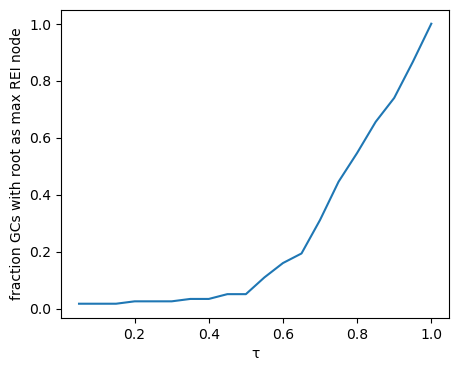

In [12]:
df.groupby("τ")[f"max {stat} node is root"].agg(lambda group: group.astype(int).sum() / len(group)).plot(xlabel="τ", ylabel=f"fraction GCs with root as max {stat} node", figsize=(5, 4));
# plt.xscale("log")

In [13]:
taus

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

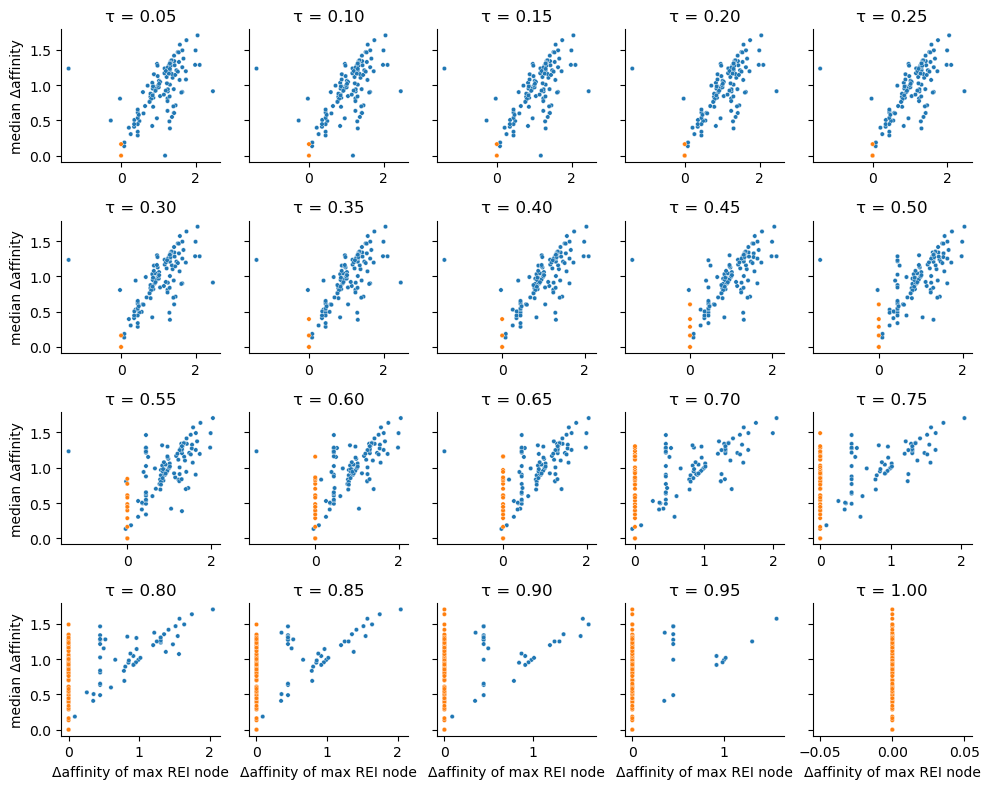

In [14]:
g = sns.relplot(data=df.loc[df.τ.isin(taus)], x=f"Δaffinity of max {stat} node", y="median Δaffinity", col="τ",
                col_wrap=5, hue="max REI node is root", height=2, s=10, legend=False,
                facet_kws={"sharex": False, "sharey": True})
for tau, ax in zip(taus, g.axes):
    ax.set_title(f"τ = {tau:.2f}")
plt.tight_layout()
plt.show()


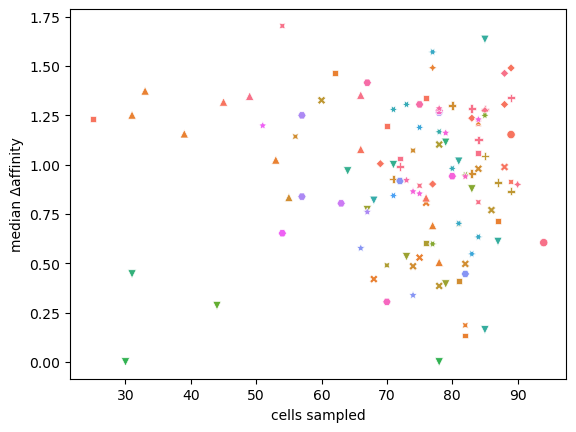

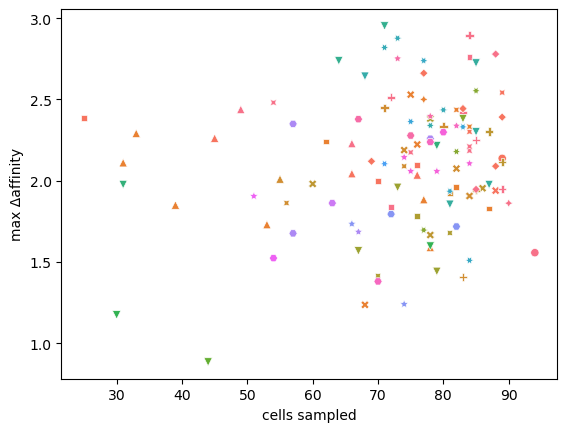

In [15]:
sns.scatterplot(data=df.loc[df.τ == taus[0]], x="cells sampled", y=f"median Δaffinity", hue="mouse", style="PR", legend=False)
plt.show()

sns.scatterplot(data=df.loc[df.τ == taus[0]], x="cells sampled", y=f"max Δaffinity", hue="mouse", style="PR", legend=False)
plt.show()

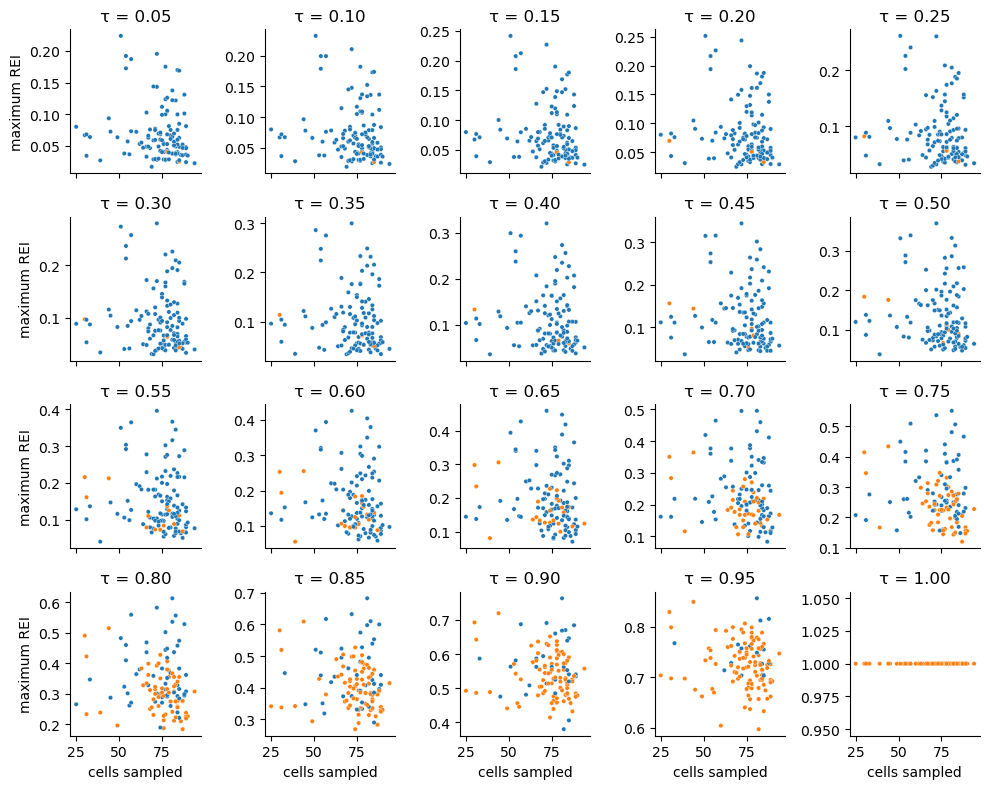

In [16]:
g = sns.relplot(data=df.loc[df.τ.isin(taus)], x="cells sampled", y=f"maximum REI", col="τ",
                col_wrap=5, hue="max REI node is root", height=2, s=10, legend=False,
                facet_kws={"sharex": True, "sharey": False})
for tau, ax in zip(taus, g.axes):
    ax.set_title(f"τ = {tau:.2f}")
plt.tight_layout()
plt.show()

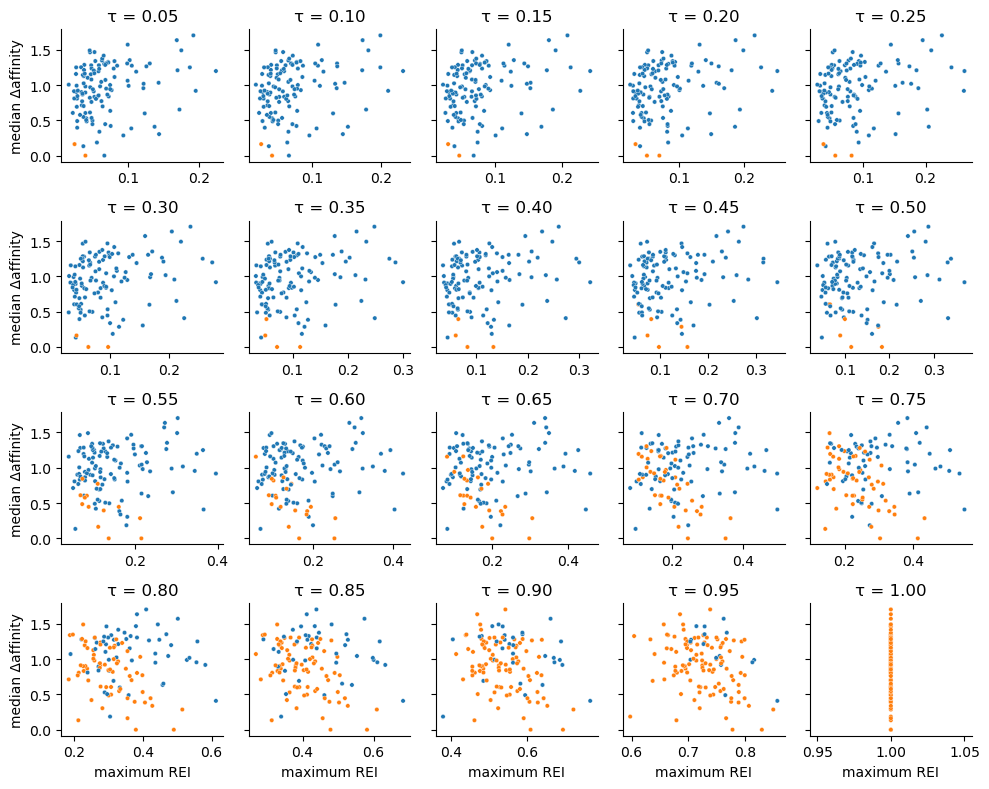

In [17]:
g = sns.relplot(data=df.loc[df.τ.isin(taus)], x=f"maximum REI", y="median Δaffinity", col="τ",
                col_wrap=5, hue="max REI node is root", height=2, s=10, legend=False,
                facet_kws={"sharex": False, "sharey": True})
for tau, ax in zip(taus, g.axes):
    ax.set_title(f"τ = {tau:.2f}")
plt.tight_layout()
plt.show()

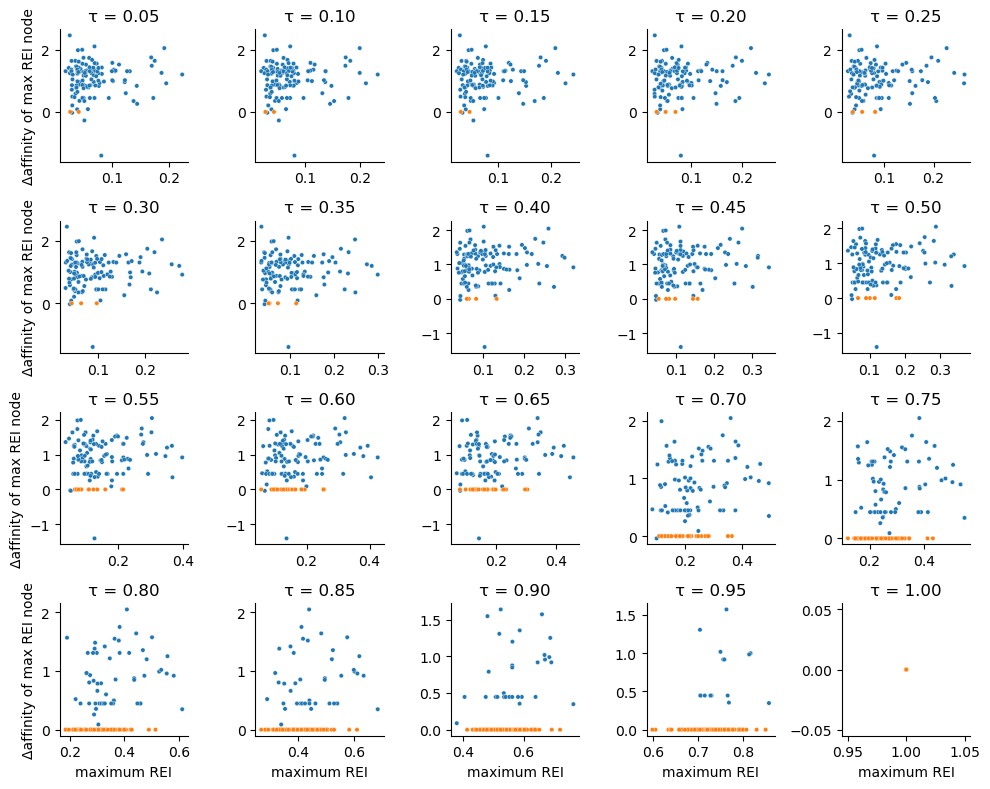

In [18]:
g = sns.relplot(data=df.loc[df.τ.isin(taus)], x=f"maximum REI", y=f"Δaffinity of max {stat} node", col="τ",
                col_wrap=5, hue="max REI node is root", height=2, s=10, legend=False,
                facet_kws={"sharex": False, "sharey": False})
for tau, ax in zip(taus, g.axes):
    ax.set_title(f"τ = {tau:.2f}")
plt.tight_layout()
plt.show()

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


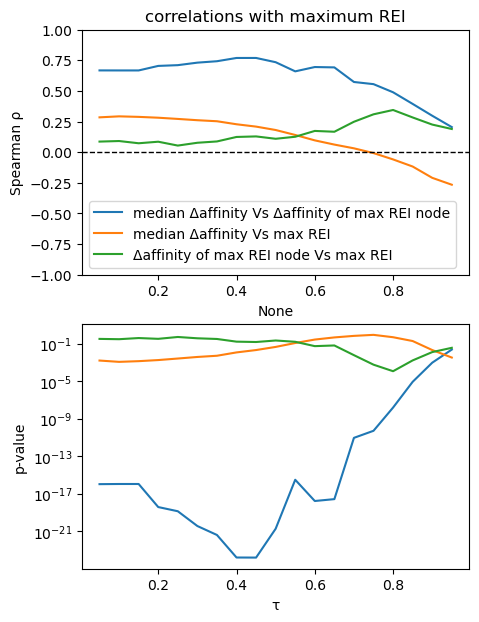

In [19]:
cor_df = pd.DataFrame()
for gc, group_df in df.groupby("τ"):
    ρ_node, p_node = sp.stats.spearmanr(group_df[f"Δaffinity of max {stat} node"], group_df[f"maximum {stat}"])
    ρ_gc, p_gc = sp.stats.spearmanr(group_df[f"median Δaffinity"], group_df[f"maximum {stat}"])
    ρ_aff, p_aff = sp.stats.spearmanr(group_df[f"median Δaffinity"], group_df[f"Δaffinity of max {stat} node"])
    cor_df.loc[gc, "ρ_node"] = ρ_node
    cor_df.loc[gc, "ρ_gc"] = ρ_gc
    cor_df.loc[gc, "p_node"] = p_node
    cor_df.loc[gc, "p_gc"] = p_gc
    cor_df.loc[gc, "ρ_aff"] = ρ_aff
    cor_df.loc[gc, "p_aff"] = p_aff

plt.figure(figsize=(5, 7))
plt.subplot(2, 1, 1)
plt.title(f"correlations with maximum {stat}")
sns.lineplot(data=cor_df, x=cor_df.index, y="ρ_aff", label=f"median Δaffinity Vs Δaffinity of max {stat} node")
sns.lineplot(data=cor_df, x=cor_df.index, y="ρ_gc", label=f"median Δaffinity Vs max {stat}")
sns.lineplot(data=cor_df, x=cor_df.index, y="ρ_node", label=f"Δaffinity of max {stat} node Vs max {stat}")
plt.axhline(0, color="k", ls="--", lw=1)
# plt.xlabel("τ")
plt.ylabel("Spearman ρ")
plt.ylim(-1, 1)
plt.legend()

plt.subplot(2, 1, 2)
sns.lineplot(data=cor_df, x=cor_df.index, y="p_aff")
sns.lineplot(data=cor_df, x=cor_df.index, y="p_gc")
sns.lineplot(data=cor_df, x=cor_df.index, y="p_node")
plt.xlabel("τ")
plt.ylabel("p-value")
plt.yscale("log")
plt.show()

In [20]:
# outcome = "mean Δaffinity"
# outcome = "median Δaffinity"
# outcome = "95th percentile Δaffinity"
outcome = f"Δaffinity of max {stat} node"
# outcome = f"ΔΔaffinity of max {stat} node"

In [21]:
# tau = taus[np.where(tau_cor_df.ρ > 0, tau_cor_df.p, 1).argmin()]
tau = taus[9]
tau

0.49999999999999994

Need to recompute tree stats using the chosen $\tau$

In [22]:
for tree in trees.values():
    calc_tree_stat(tree, stat, tau)

In [23]:
df = df.loc[df["τ"] == tau].sort_values(f"maximum {stat}").reset_index()
df

,index,uid,τ,PR,mouse,GC,time,cells sampled,normalized dominance score,maximum REI,max Δaffinity,95th percentile Δaffinity,mean Δaffinity,median Δaffinity,Δaffinity of max REI node,ΔΔaffinity of max REI node,max REI node is root
0,1123,PR1.07_mouse3_GC64,0.5,1.07,22,107,d20,39.0,0.435897,0.038462,1.850506,1.695969,1.001682,1.156395,1.357550,0.052247,False
1,1090,PR1.03_mouse3_GC56,0.5,1.03,22,74,d20,87.0,0.413793,0.047593,1.829732,1.543696,0.779229,0.712662,1.457166,0.993175,False
2,1089,PR1.03_mouse3_GC46,0.5,1.03,22,73,d20,82.0,0.390244,0.048780,1.961632,1.546807,0.106270,0.133744,0.083486,0.072970,False
3,1075,PR1.02_mouse3_GC58,0.5,1.02,22,59,d20,76.0,0.684211,0.050164,2.223167,1.986581,0.530252,0.806844,-0.028390,-0.000292,False
4,1108,PR1.05_mouse2_GC23,0.5,1.05,21,92,d20,69.0,0.768116,0.050767,2.120026,1.786078,0.494627,1.004750,1.249947,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1101,PR1.04_mouse4_GC70,0.5,1.04,23,85,d20,83.0,0.987952,0.312688,1.408283,1.077436,0.825024,0.955074,0.955074,-0.028470,False
115,1182,PR2.04_mouse5_GC17A,0.5,2.04,16,47,d15,51.0,0.862745,0.331189,1.905381,1.401916,0.863571,1.197998,1.197998,0.751925,False
116,1092,PR1.03_mouse4_GC50,0.5,1.03,23,76,d20,81.0,0.962963,0.332031,1.924685,1.241651,0.517758,0.408566,0.348144,0.348144,False
117,1171,PR2.03_mouse2_GC7B,0.5,2.03,14,35,d15,57.0,0.947368,0.338584,2.349833,2.069767,1.100253,1.249947,1.249947,0.803875,False


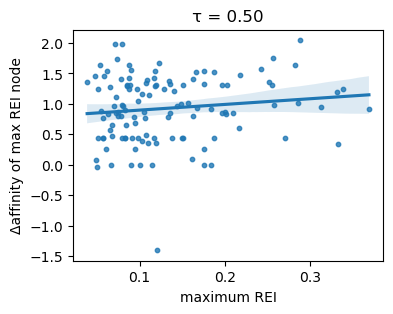

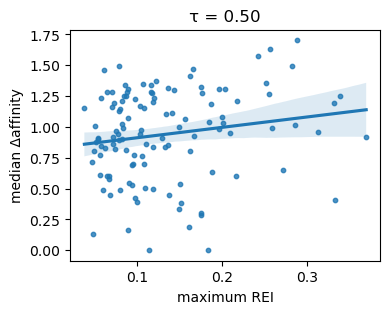

In [24]:
plt.figure(figsize=(4, 3))
sns.regplot(data=df, x=f"maximum {stat}", y=outcome, scatter_kws=dict(s=10))
plt.title(f"τ = {tau:.2f}")
plt.show()

# plt.figure(figsize=(4, 3))
# sns.regplot(data=df.loc[df[outcome] != 0], x=f"maximum {stat}", y=outcome, scatter_kws=dict(s=10), label="no roots")
# plt.title(f"τ = {tau:.2f}")
# plt.legend()
# plt.show()

plt.figure(figsize=(4, 3))
sns.regplot(data=df, x=f"maximum {stat}", y="median Δaffinity", scatter_kws=dict(s=10))
plt.title(f"τ = {tau:.2f}")
plt.show()

In [25]:
thresh = 0.25

In [26]:
df.to_csv(f"{output_dir}/data.csv")

## Rank plot of total GC cell abundance 

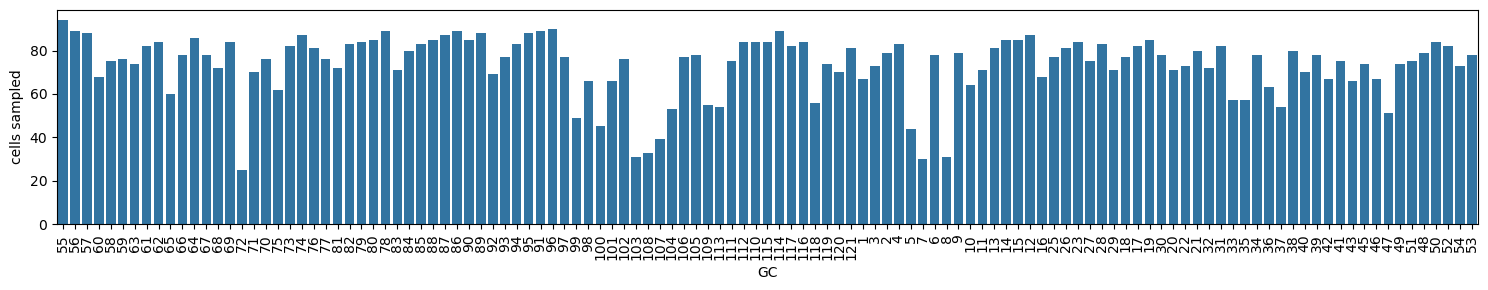

In [27]:
plt.figure(figsize=(15, 3))
ax = sns.barplot(data=df.sort_values(["PR", "mouse", "cells sampled"]), x="GC", y="cells sampled", #hue="mouse",
                #  hue_order=df.mouse.unique(),
                 legend=False,
                 dodge=False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"{output_dir}/abundances.pdf")
plt.show()

## Plot tree shape stats in a scatter plot, and render some example trees
For each tree we render it colored by fitness statistic, then by affinity, and by fitness stat

In [28]:
rm {output_dir}/trees/*.svg

PR1.07_mouse1_GC11 REI


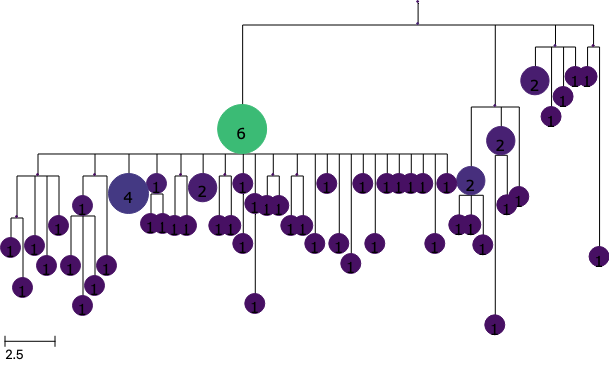

PR1.07_mouse1_GC11 Δaffinity


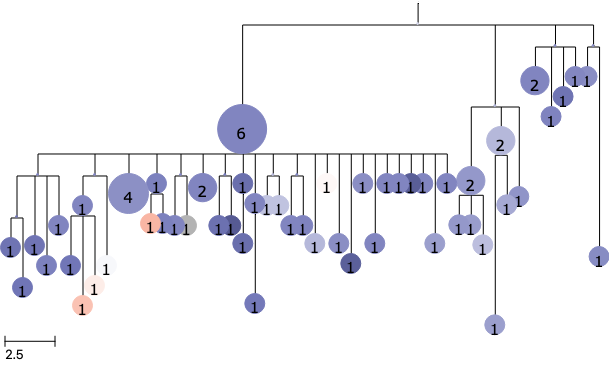

PR2.03_mouse2_GC6A REI


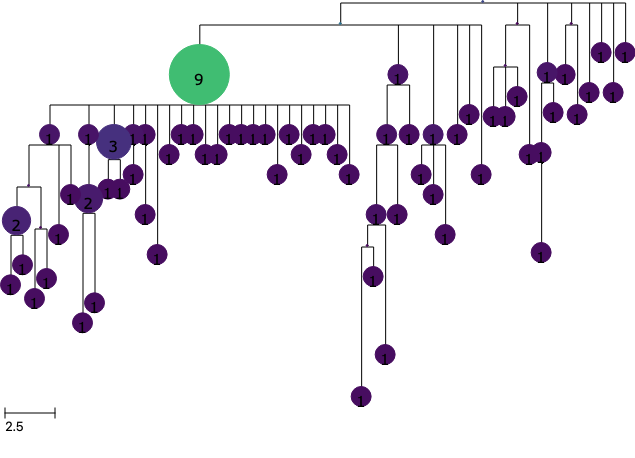

PR2.03_mouse2_GC6A Δaffinity


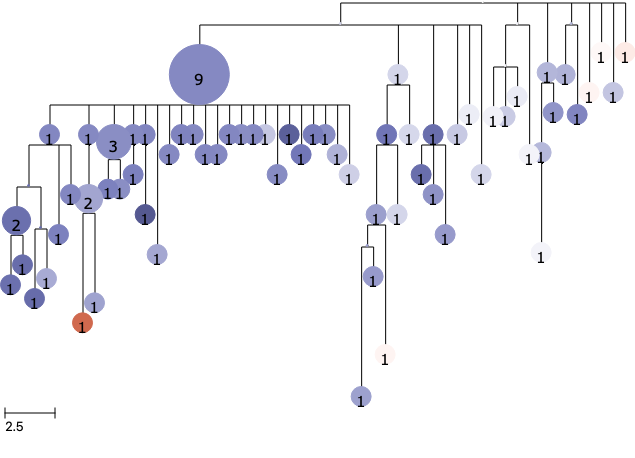

PR2.01_mouse6_GC6D REI


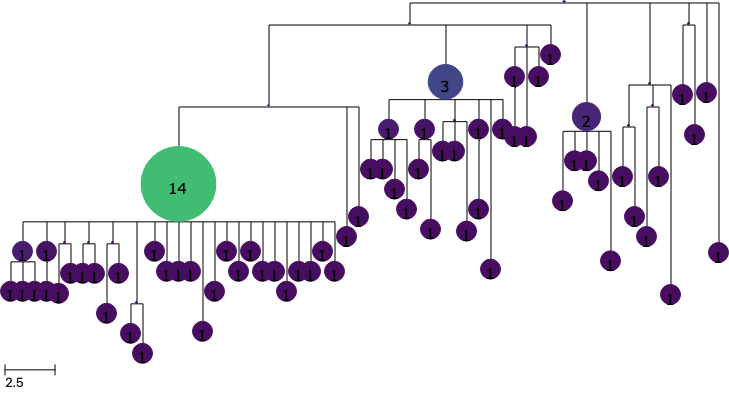

PR2.01_mouse6_GC6D Δaffinity


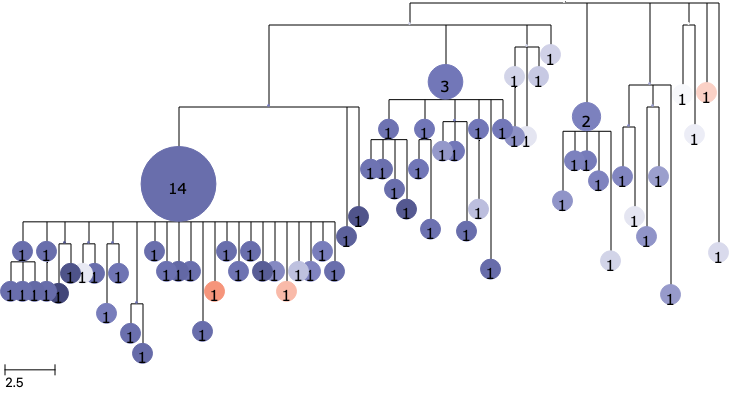

PR1.02_mouse2_GC38 REI


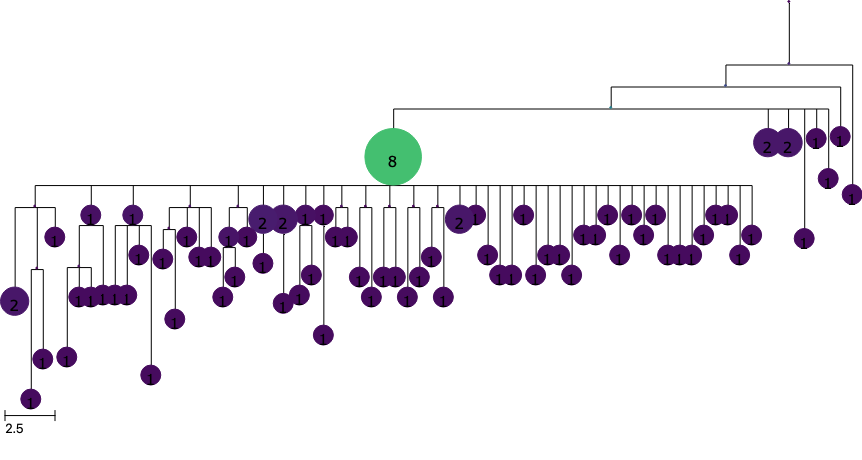

PR1.02_mouse2_GC38 Δaffinity


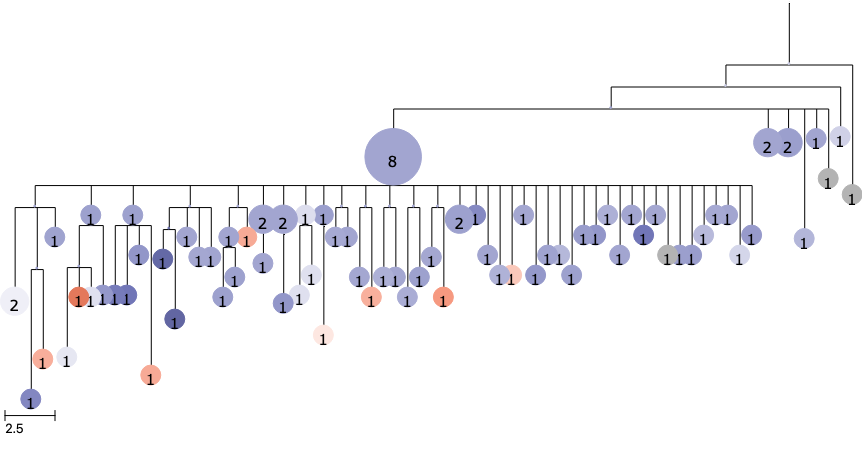

PR2.03_mouse5_GC19A REI


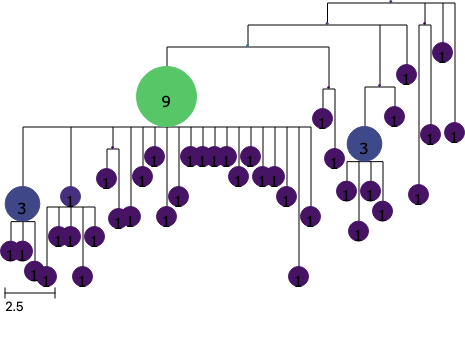

PR2.03_mouse5_GC19A Δaffinity


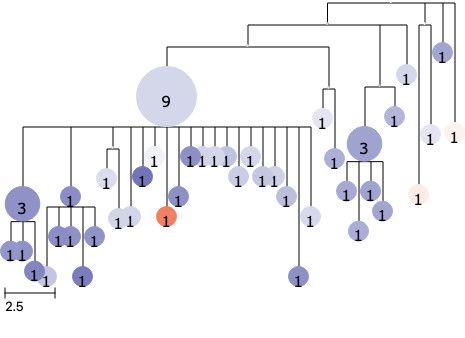

PR1.06_mouse3_GC66 REI


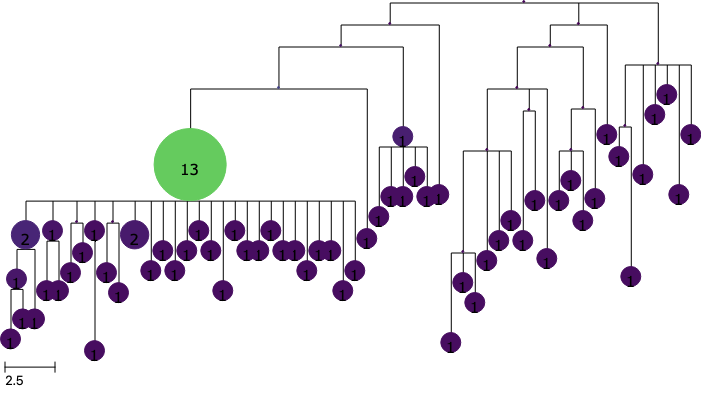

PR1.06_mouse3_GC66 Δaffinity


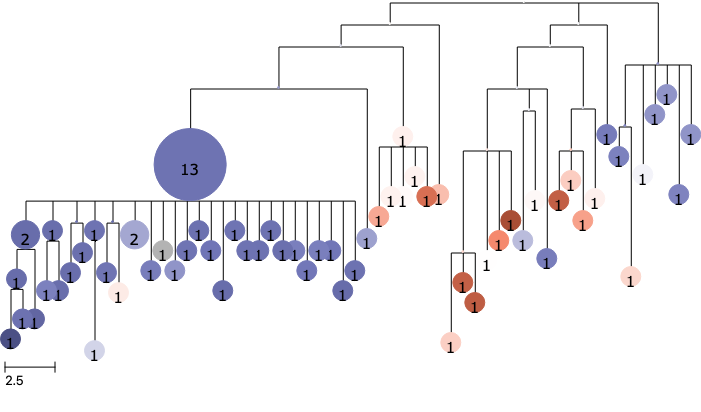

PR2.01_mouse6_GC6B REI


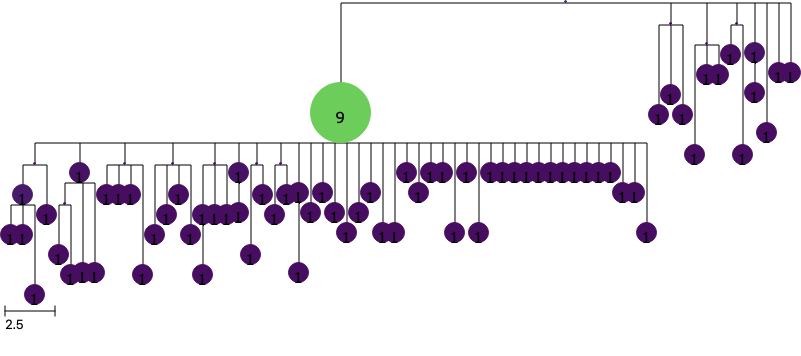

PR2.01_mouse6_GC6B Δaffinity


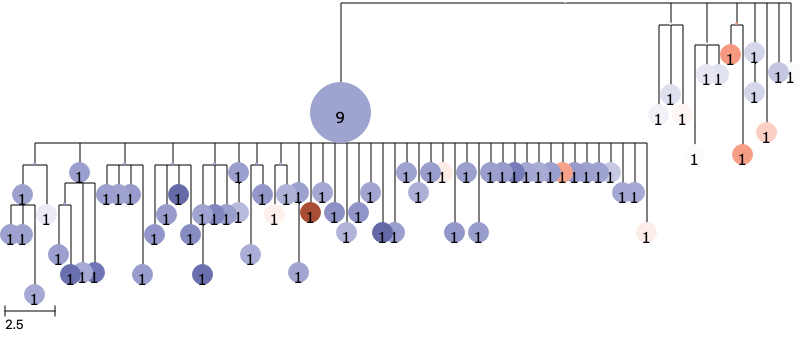

PR1.08_mouse1_GC7 REI


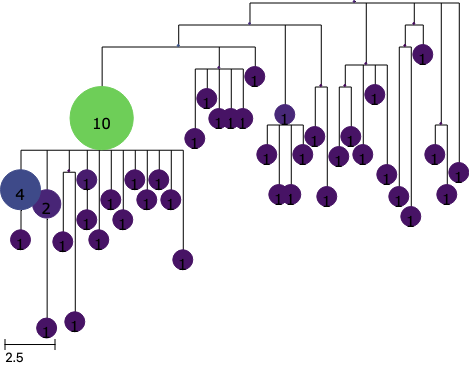

PR1.08_mouse1_GC7 Δaffinity


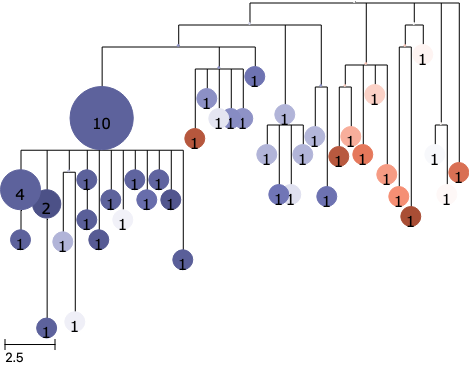

PR1.04_mouse4_GC70 REI


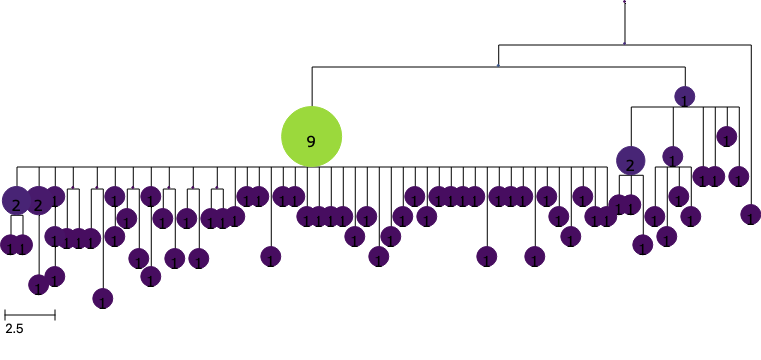

PR1.04_mouse4_GC70 Δaffinity


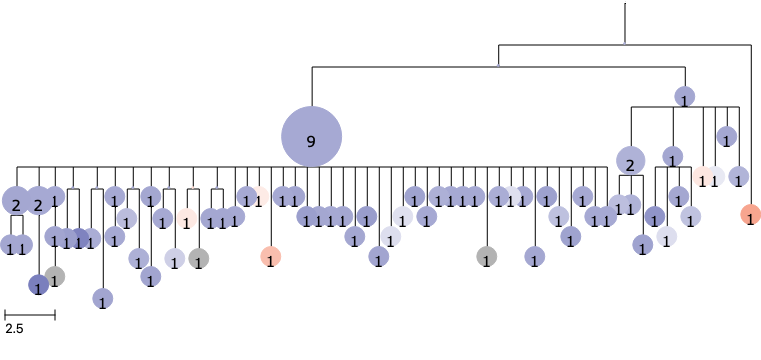

PR2.04_mouse5_GC17A REI


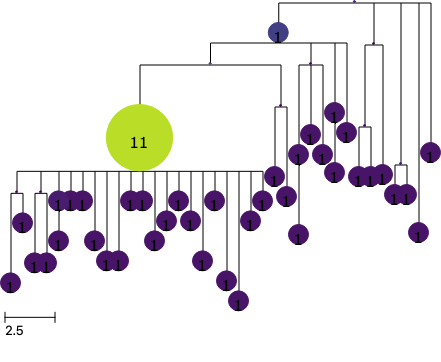

PR2.04_mouse5_GC17A Δaffinity


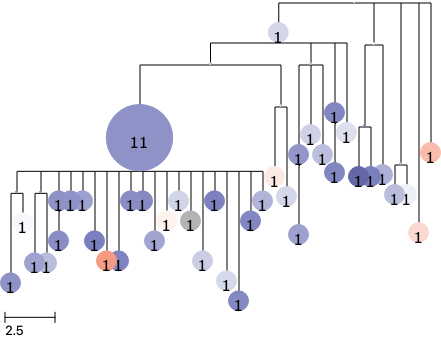

PR1.03_mouse4_GC50 REI


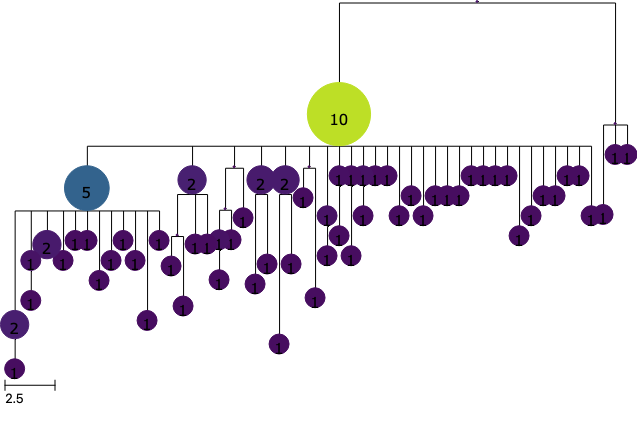

PR1.03_mouse4_GC50 Δaffinity


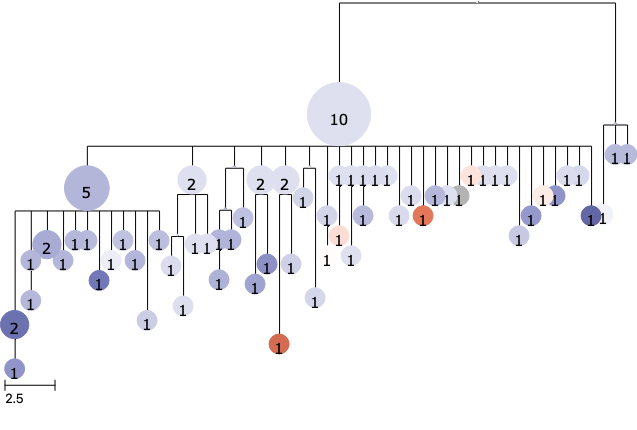

PR2.03_mouse2_GC7B REI


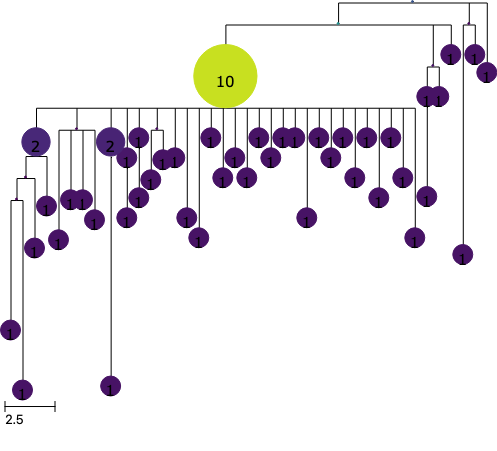

PR2.03_mouse2_GC7B Δaffinity


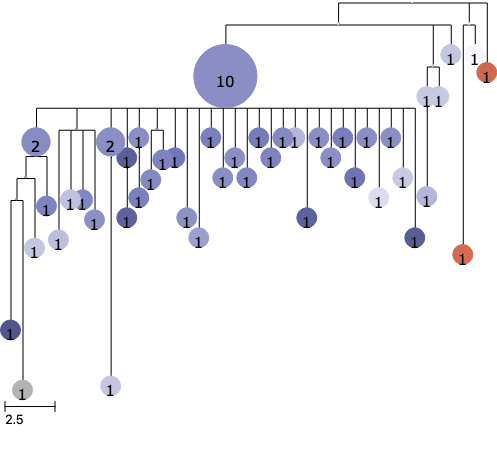

PR2.03_mouse1_GC4A REI


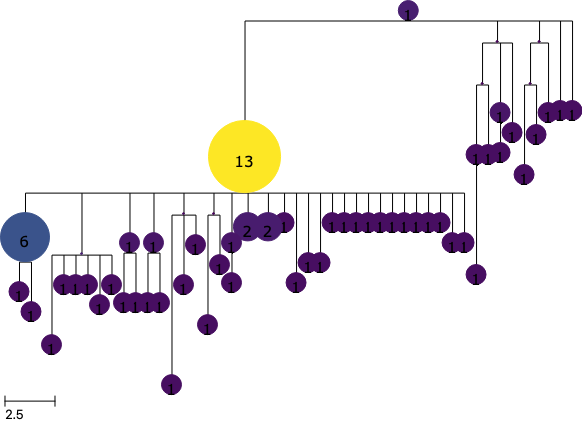

PR2.03_mouse1_GC4A Δaffinity


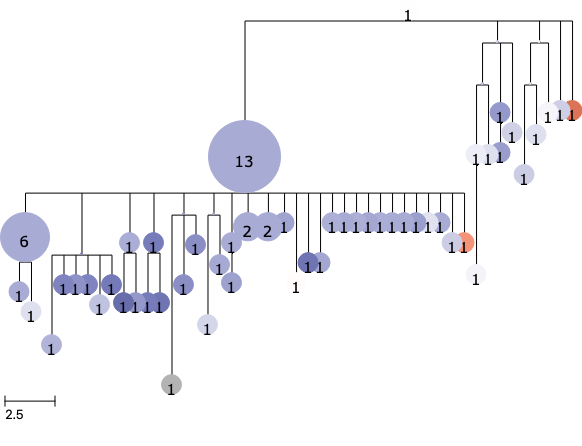

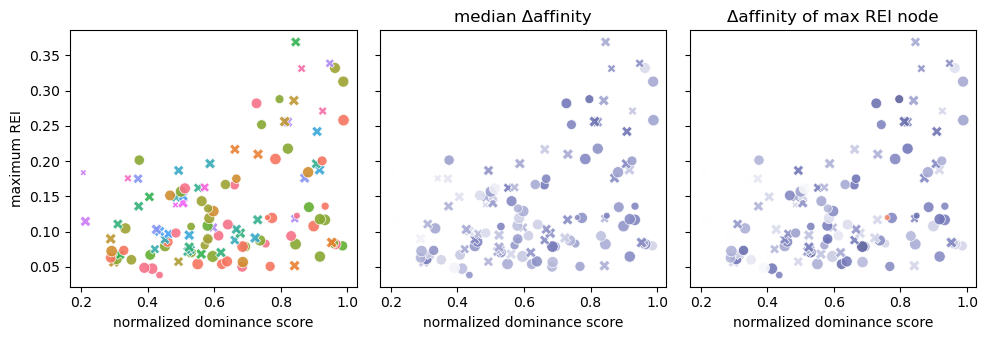

In [29]:
# stat cmap
cmap = "viridis"
vmin = min(getattr(node, stat) for tree in trees.values() for node in tree.tree.traverse())
vmax = max(getattr(node, stat) for tree in trees.values() for node in tree.tree.traverse())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3.5), sharey=True)
sns.scatterplot(data=df, x="normalized dominance score", y=f"maximum {stat}", hue="mouse", size="cells sampled", style="time",
                clip_on=False, alpha=0.9,
                legend=False,
                ax=ax1)
# sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
ax2.set_title("median Δaffinity")
sns.scatterplot(data=df, x="normalized dominance score", y=f"maximum {stat}", hue="median Δaffinity", size="cells sampled", style="time",
                clip_on=False, alpha=0.9,
                palette=pc.affinity_trees.cmap, hue_norm=pc.affinity_trees.norm,
                legend=False,
                ax=ax2)
ax3.set_title(outcome)
sns.scatterplot(data=df, x="normalized dominance score", y=f"maximum {stat}", hue=outcome, size="cells sampled", style="time",
                clip_on=False, alpha=0.9,
                palette=pc.affinity_trees.cmap, hue_norm=pc.affinity_trees.norm,
                legend=False,
                ax=ax3)
# ax1.set_yscale("log")
# ax2.set_yscale("log")
# ax3.set_yscale("log")
for i, row in df.iterrows():
    x, y = row[["normalized dominance score", f"maximum {stat}"]]
    key = row.uid
    colormap1 = trees[key].feature_colormap(stat, vmin=vmin, vmax=vmax, scale="symlog", linthresh=1, cmap=cmap)
    for scale in (5, 20):
        trees[key].render(f"{output_dir}/trees/{key}.{stat}.scale{scale}.svg", colormap=colormap1, scale=scale, branch_margin=-8)
    if row[f"maximum {stat}"] > thresh:
        print(row.uid, stat)
        if row[f"max {stat} node is root"]:
            print(f"NOTE: max {stat} node is root")
        display(trees[key].render("%%inline", colormap=colormap1, scale=20, branch_margin=-8))
    # colormap2 = trees[key].feature_colormap("delta_bind", vmin=vmin2, vmax=vmax2, cmap=cmap2)
    colormap2 = {node.name: to_hex(pc.affinity_trees.cmap(pc.affinity_trees.norm(getattr(node, "delta_bind"))))
                 for node in trees[key].tree.traverse()
                 }
    for scale in (5, 20):
        trees[key].render(f"{output_dir}/trees/{key}.binding.scale{scale}.svg", colormap=colormap2, scale=scale, branch_margin=-8)
    if row[f"maximum {stat}"] > thresh:
        print(row.uid, "Δaffinity")
        display(trees[key].render("%%inline", colormap=colormap2, scale=20, branch_margin=-8))
plt.tight_layout()
plt.savefig(f"{output_dir}/scatter.pdf")
plt.show()

In [30]:
trees.keys()

dict_keys(['PR1.01_mouse1_GC20', 'PR1.01_mouse2_GC32', 'PR1.02_mouse2_GC38', 'PR1.02_mouse3_GC55', 'PR1.02_mouse3_GC58', 'PR1.02_mouse3_GC72', 'PR1.02_mouse4_GC47', 'PR1.02_mouse4_GC48', 'PR1.02_mouse4_GC73', 'PR1.02_mouse5_GC78', 'PR1.02_mouse5_GC82', 'PR1.02_mouse5_GC83', 'PR1.02_mouse6_GC74', 'PR1.03_mouse1_GC16', 'PR1.03_mouse1_GC17', 'PR1.03_mouse2_GC30', 'PR1.03_mouse2_GC31', 'PR1.03_mouse2_GC39', 'PR1.03_mouse3_GC46', 'PR1.03_mouse3_GC56', 'PR1.03_mouse3_GC59', 'PR1.03_mouse4_GC50', 'PR1.03_mouse6_GC77', 'PR1.04_mouse1_GC1', 'PR1.04_mouse1_GC14', 'PR1.04_mouse1_GC15', 'PR1.04_mouse1_GC2', 'PR1.04_mouse1_GC6', 'PR1.04_mouse4_GC68', 'PR1.04_mouse4_GC69', 'PR1.04_mouse4_GC70', 'PR1.04_mouse5_GC79', 'PR1.04_mouse5_GC80', 'PR1.04_mouse5_GC81', 'PR1.05_mouse1_GC13', 'PR1.05_mouse1_GC18', 'PR1.05_mouse2_GC21', 'PR1.05_mouse2_GC23', 'PR1.05_mouse2_GC24', 'PR1.05_mouse2_GC25', 'PR1.05_mouse2_GC26', 'PR1.06_mouse1_GC19', 'PR1.06_mouse3_GC66', 'PR1.07_mouse1_GC11', 'PR1.07_mouse1_GC12', 'P

## Color bars for the tree colormaps

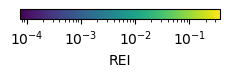

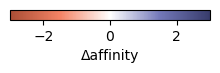

In [31]:
fig = plt.figure(figsize=(2, 1))
cax = fig.add_axes([0, 0, 1, 0.1])
plt.colorbar(cm.ScalarMappable(cmap=cmap, norm=LogNorm(vmin=vmin, vmax=vmax)),
             orientation='horizontal',
             cax=cax,
             label=f"{stat}")
plt.savefig(f"{output_dir}/cbar1.pdf", bbox_inches="tight")
plt.show()

fig = plt.figure(figsize=(2, 1))
cax = fig.add_axes([0, 0, 1, 0.1])
plt.colorbar(cm.ScalarMappable(cmap=pc.affinity_trees.cmap, norm=pc.affinity_trees.norm),
             orientation='horizontal',
             cax=cax,
             label="Δaffinity")
plt.savefig(f"{output_dir}/cbar2.pdf", bbox_inches="tight")
plt.show()

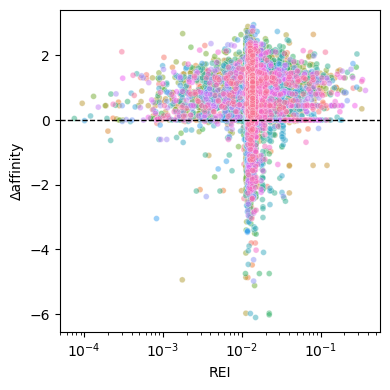

In [32]:
dat = []
for gc, tree in trees.items():
    for node in tree.tree.traverse():
        dat.append([gc, getattr(node, stat), node.delta_bind])

df_nodes = pd.DataFrame(dat, columns=["GC", stat, "Δaffinity"])

plt.figure(figsize=(4, 4))
sns.scatterplot(data=df_nodes, x=stat, y="Δaffinity", hue="GC", legend=False, alpha=0.5, size=.1)
plt.axhline(0, ls="--", c="k", lw=1)
plt.axvline(0, ls="--", c="k", lw=1)
plt.xscale("log")
plt.tight_layout()
plt.show()

## Summary

- Developed REI, because no branch lengths with LB
- Doesn't correlate will with GC affinity
- Recent motivated by evolving affinity

